In [1]:
from osgeo import gdal, osr
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

## Results plot

In [2]:
gauge_satellite_rmse= 'intercomparison/gauge_satellite_rmse.tif'
radar_satellite_rmse= 'intercomparison/radar_satellite_rmse_cliped.tif'
gauge_radar_rmse= 'intercomparison/gauge_radar_rmse.tif'
gauge_rmse= 'TCresults/rmse_gauge.tif'
satellite_rmse= 'TCresults/rmse_sat.tif'
radar_rmse= 'TCresults/rmse_radar.tif'

gauge_satellite_mae= 'intercomparison/gauge_satellite_mae.tif'
radar_satellite_mae= 'intercomparison/radar_satellite_mae_cliped.tif'
gauge_radar_mae= 'intercomparison/gauge_radar_mae.tif'

gauge_satellite_rmse_norm= 'intercomparison/gauge_satellite_norm_rmse.tif'
radar_satellite_rmse_norm= 'intercomparison/radar_satellite_norm_rmse_cliped.tif'
gauge_radar_rmse_norm= 'intercomparison/gauge_radar_norm rmse.tif'
gauge_rmse= 'TCresults/rmse_gauge.tif'
satellite_rmse= 'TCresults/rmse_sat.tif'
radar_rmse= 'TCresults/rmse_radar.tif'

gauge_satellite_cc= 'intercomparison/gauge_satellite_r.tif'
radar_satellite_cc= 'intercomparison/radar_satellite_r_cliped.tif'
gauge_radar_cc= 'intercomparison/gauge_radar_r.tif'
gauge_cc= 'TCresults/cc_gauge.tif'
satellite_cc= 'TCresults/cc_sat.tif'
radar_cc= 'TCresults/cc_radar.tif'
gauge_radar_pod= 'intercomparison/gauge_radar_pod.tif'
gauge_radar_csi= 'intercomparison/gauge_radar_csi.tif'
gauge_radar_far= 'intercomparison/gauge_radar_far.tif'
radar_satellite_pod= 'intercomparison/radar_satellite_pod_cliped.tif'
radar_satellite_csi= 'intercomparison/radar_satellite_csi_cliped.tif'
radar_satellite_far= 'intercomparison/radar_satellite_far_cliped.tif'
gauge_satellite_pod= 'intercomparison/gauge_satellite_pod.tif'
gauge_satellite_csi= 'intercomparison/gauge_satellite_csi.tif'
gauge_satellite_far= 'intercomparison/gauge_satellite_far.tif'
gauge_sum= 'intercomparison/gauge_satellite_sum_gauge.tif'
radar_sum= 'intercomparison/radar_satellite_sum_radar_cliped.tif'
satellite_sum= 'intercomparison/gauge_satellite_sum_satellite_cliped.tif'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


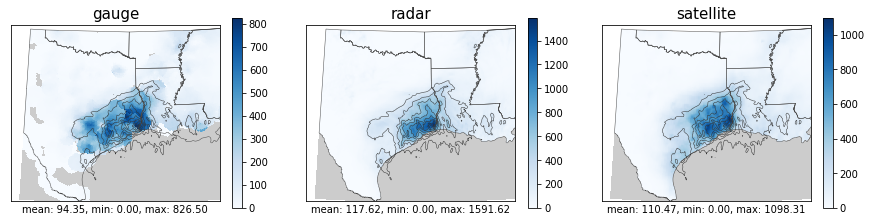

In [8]:
fig= plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot_amt(gauge_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(1,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot_amt(radar_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(1,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot_amt(satellite_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
# fig.savefig('total_comparison.png', dpi=100)

In [5]:
def plot_mae(src):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/rainfall_amount','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap('Reds')
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=5)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


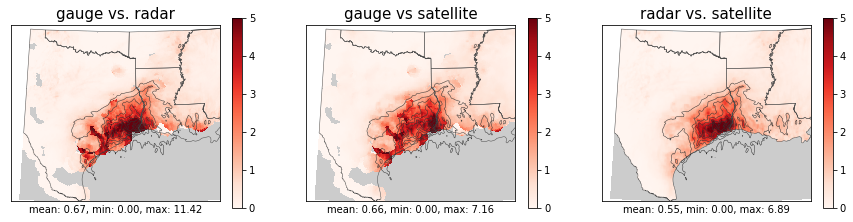

In [6]:
fig= plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,3,1)
ax.set_title("gauge vs. radar",fontsize=15)
map, avg, mn, mx = plot_mae(gauge_radar_mae)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(1,3,2)
ax.set_title("gauge vs satellite",fontsize=15)
map, avg, mn, mx = plot_mae(gauge_satellite_mae)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(1,3,3)
ax.set_title("radar vs. satellite",fontsize=15)
map, avg, mn, mx = plot_mae(radar_satellite_mae)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
# fig.savefig('mae_comparison.png', dpi=100)

### Plot RMSE error

In [49]:
def plot(src):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/rainfall_amount','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap('Reds')
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=5)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


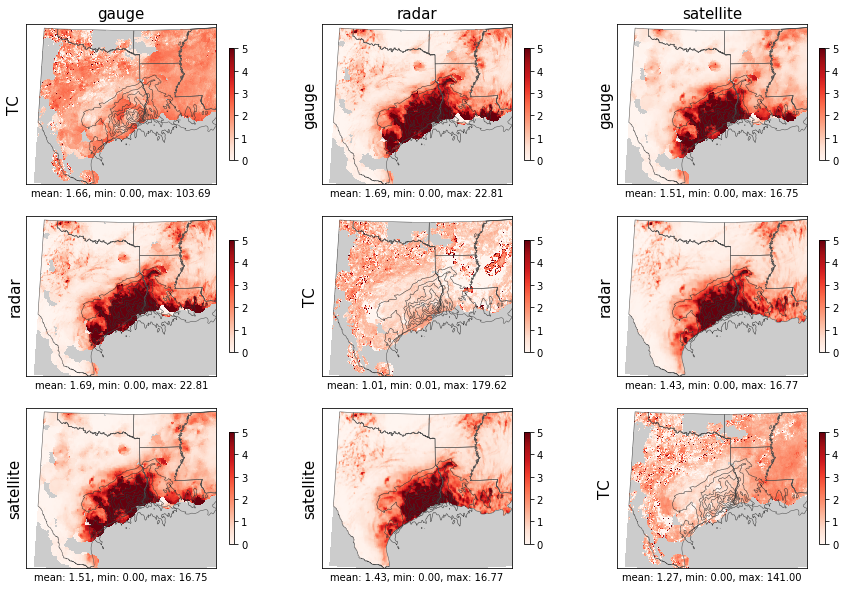

In [89]:
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot(gauge_rmse)
ax.set_ylabel('TC',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot(gauge_radar_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot(gauge_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx = plot(gauge_radar_rmse)
ax.set_ylabel('radar',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx = plot(radar_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx = plot(radar_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar',fontsize=15)

ax = fig.add_subplot(3,3,7)
ax.set_ylabel('satellite',fontsize=15)
map, avg, mn, mx = plot(gauge_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,8)

map, avg, mn, mx = plot(radar_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite',fontsize=15)

ax = fig.add_subplot(3,3,9)

map, avg, mn, mx = plot(satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

plt.show()
# fig.savefig('rmse_comparison.png', dpi=100)

In [ ]:
# normalized
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot(gauge_rmse)
ax.set_ylabel('TC',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot(gauge_radar_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot(gauge_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx = plot(gauge_radar_rmse)
ax.set_ylabel('radar',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx = plot(radar_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx = plot(radar_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar',fontsize=15)

ax = fig.add_subplot(3,3,7)
ax.set_ylabel('satellite',fontsize=15)
map, avg, mn, mx = plot(gauge_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,8)

map, avg, mn, mx = plot(radar_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite',fontsize=15)

ax = fig.add_subplot(3,3,9)

map, avg, mn, mx = plot(satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

plt.show()
# fig.savefig('rmse_comparison.png', dpi=100)

### Plot CC

In [46]:
def plot_cc(src):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/rainfall_amount','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap('Reds')
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=1)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


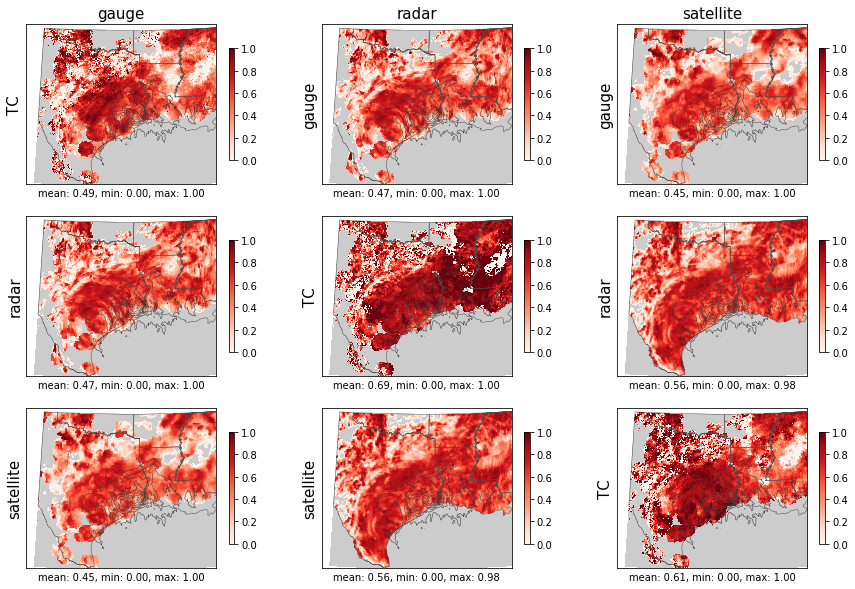

In [90]:
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot_cc(gauge_cc)
ax.set_ylabel('TC',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot_cc(gauge_radar_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot_cc(gauge_satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx = plot_cc(gauge_radar_cc)
ax.set_ylabel('radar',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx = plot_cc(radar_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx = plot_cc(radar_satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar',fontsize=15)

ax = fig.add_subplot(3,3,7)
ax.set_ylabel('satellite',fontsize=15)
map, avg, mn, mx = plot_cc(gauge_satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,8)

map, avg, mn, mx = plot_cc(radar_satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite',fontsize=15)

ax = fig.add_subplot(3,3,9)

map, avg, mn, mx = plot_cc(satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

plt.show()
# fig.savefig('cc_comparison.png', dpi=100)

### Plot hits

In [42]:
def plot_hit(src, cmap='Reds'):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0) | (data>1)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/rainfall_amount','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap(cmap)
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=1)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


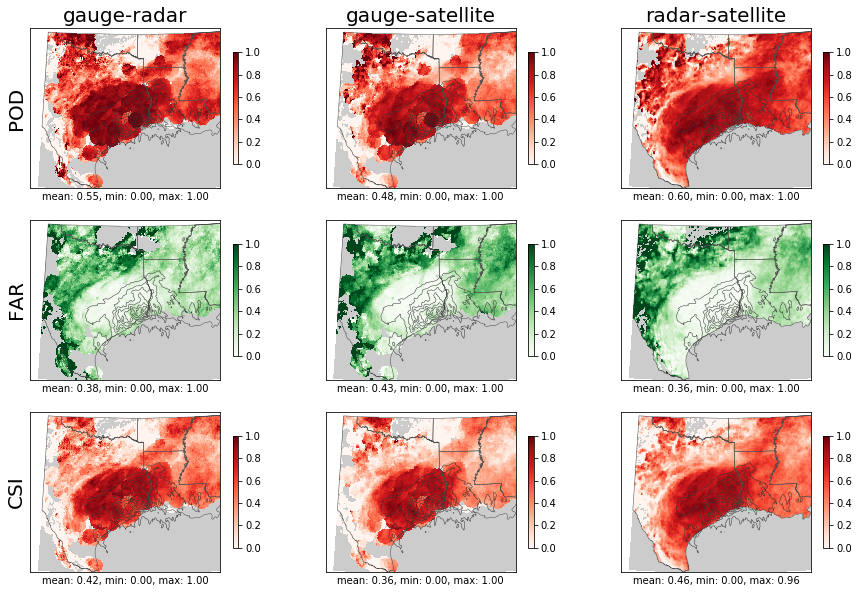

In [91]:
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge-radar",fontsize=20)
map, avg, mn, mx = plot_hit(gauge_radar_pod)
ax.set_ylabel('POD',fontsize=20)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("gauge-satellite",fontsize=20)
map, avg, mn, mx  = plot_hit(gauge_satellite_pod)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,3)
ax.set_title("radar-satellite",fontsize=20)
map, avg, mn, mx  = plot_hit(radar_satellite_pod)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx  = plot_hit(gauge_radar_far, 'Greens')
ax.set_ylabel('FAR',fontsize=20)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx  = plot_hit(gauge_satellite_far, 'Greens')
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx  = plot_hit(radar_satellite_far, 'Greens')
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax = fig.add_subplot(3,3,7)
ax.set_ylabel('CSI',fontsize=20)
map, avg, mn, mx  = plot_hit(gauge_radar_csi)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax = fig.add_subplot(3,3,8)

map, avg, mn, mx  = plot_hit(gauge_satellite_csi)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax = fig.add_subplot(3,3,9)

map, avg, mn, mx  = plot_hit(radar_satellite_csi)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
plt.show()
# fig.savefig('hits_comparison.png', dpi=100)

### Rainfall accumulation and bias ratio

In [3]:
def plot_amt(src, cmap='Blues'):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/rainfall_amount','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap(cmap)
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=mx)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

In [85]:
def plot_rat(src1, src2, cmap='cool'):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata1 = gdal.Open(src1)
    gdata2 = gdal.Open(src2) 
    
    geo = gdata1.GetGeoTransform()
    data1 = gdata1.ReadAsArray().astype(float)
    data2= gdata2.ReadAsArray().astype(float)
    if data1.shape[0]==data2.shape[0]+1:
        data1= data1[:-1,:]
        geo = gdata2.GetGeoTransform()
        gdata= gdata2
    elif data1.shape[0]==data2.shape[0]-1:
        data2= data2[:-1,:]
        geo = gdata1.GetGeoTransform()
        gdata= gdata1
    else:
        gdata= gdata1
    data1[data1<=0.1]= np.nan
    data2[data2<=0.1]= np.nan
    data= data1/data2
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/rainfall_amount','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap(cmap)
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=2)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


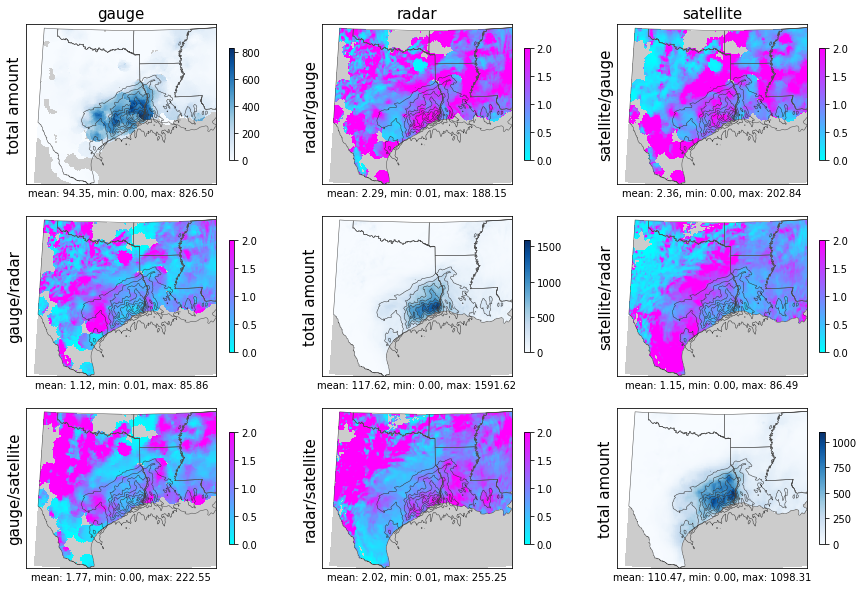

In [87]:
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot_amt(gauge_sum)
ax.set_ylabel('total amount',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot_rat(radar_sum,gauge_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar/gauge',fontsize=15)

ax = fig.add_subplot(3,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot_rat(satellite_sum, gauge_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite/gauge',fontsize=15)

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx = plot_rat(gauge_sum, radar_sum)
ax.set_ylabel('gauge/radar',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx = plot_amt(radar_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('total amount',fontsize=15)

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx = plot_rat(satellite_sum, radar_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite/radar',fontsize=15)

ax = fig.add_subplot(3,3,7)
ax.set_ylabel('gauge/satellite',fontsize=15)
map, avg, mn, mx = plot_rat(gauge_sum, satellite_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,8)

map, avg, mn, mx = plot_rat(radar_sum, satellite_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar/satellite',fontsize=15)

ax = fig.add_subplot(3,3,9)

map, avg, mn, mx = plot_amt(satellite_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('total amount',fontsize=15)

plt.show()
# fig.savefig('volume_ratio.png', dpi=100)

## Zonal statistic analysis

In [127]:
import pandas as pd

gauge_cc_zonal= pd.read_csv('TCresults/gauge_cc_zonal.csv')
radar_cc_zonal= pd.read_csv('TCresults/radar_cc_zonal.csv')
sat_cc_zonal= pd.read_csv('TCresults/satellite_cc_zonal.csv')
gauge_rmse_zonal= pd.read_csv('TCresults/gauge_rmse_zonal.csv')
radar_rmse_zonal= pd.read_csv('TCresults/radar_rmse_zonal.csv')
sat_rmse_zonal= pd.read_csv('TCresults/satellite_rmse_zonal.csv')
sat_zone=pd.read_csv('TCresults/zonal_stats.csv')

stats_zone= {}
dfs= [gauge_cc_zonal, radar_cc_zonal, sat_cc_zonal, gauge_rmse_zonal, radar_rmse_zonal, sat_rmse_zonal]
keys= ['gauge_cc', 'radar_cc', 'satellite_cc', 'gauge_rmse', 'radar_rmse', 'satellite_rmse']

In [128]:
def data_preprocess(df):
    '''
    Input:
    -------------
    :df - pandas.DataFrame
    '''
    colnames= df.columns
    bin_values= [col.split('_')[-1] for col in colnames if col.startswith('HISTO')]
    zone_counts= [df.loc[[0,1,2,4,5], col].sum(axis=0) for col in colnames if col.startswith('HISTO')]
    non_zone_counts= [df.loc[[3], col].sum(axis=0) for col in colnames if col.startswith('HISTO')]

    bin_values= np.array(bin_values).astype(float)
    mask= np.where(bin_values>=0)[0]
    bin_values= bin_values[mask]
    zone_counts= np.array(zone_counts)[mask]
    non_zone_counts= np.array(non_zone_counts)[mask]
    zone_values= sum([zone_counts[i]*[bin_values[i]] for i in range(len(bin_values))],[])
    non_zone_values= sum([non_zone_counts[i]*[bin_values[i]] for i in range(len(bin_values))],[])

    return (np.array(zone_values), np.array(non_zone_values))

In [129]:
for i, df in enumerate(dfs):
    stats_zone[keys[i]]= data_preprocess(df)

In [227]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

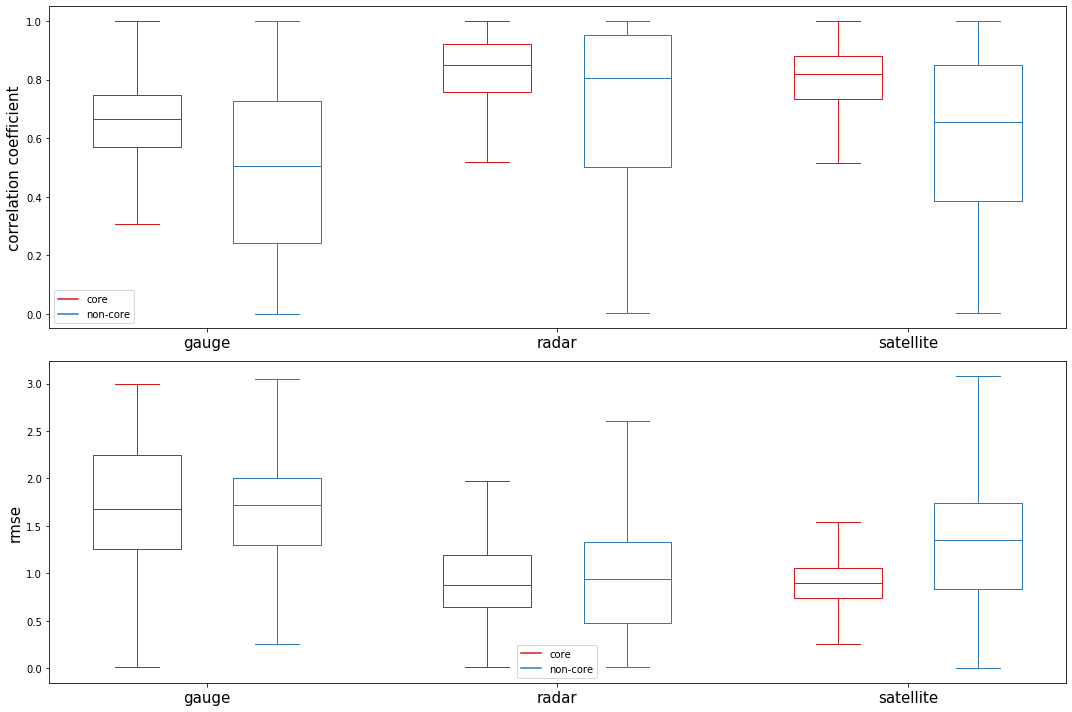

In [276]:
fig, ax= plt.subplots(2,1,figsize=(15,10))
bxl_1= ax[0].boxplot([stats_zone['gauge_cc'][0], stats_zone['radar_cc'][0], stats_zone['satellite_cc'][0]],
              positions= np.array(range(3))*2-0.4, widths= .5,showfliers=False)
bxr_1= ax[0].boxplot([stats_zone['gauge_cc'][1], stats_zone['radar_cc'][1], stats_zone['satellite_cc'][1]],
              positions= np.array(range(3))*2+0.4, widths= .5,showfliers=False)
set_box_color(bxl_1, '#D7191C')
set_box_color(bxr_1, '#2C7BB6')
ax[0].plot([], c='#D7191C', label='core')
ax[0].plot([], c='#2C7BB6', label='non-core')
ax[0].legend()
ax[0].set_xticks(range(0, 3 * 2, 2))
ax[0].set_xticklabels(['gauge', 'radar', 'satellite'], fontsize=15)
ax[0].set_ylabel('correlation coefficient', fontsize=15)
# fig.savefig('cc_zone.png', dpi=100)

bxl_1= ax[1].boxplot([(stats_zone['gauge_rmse'][0]), (stats_zone['radar_rmse'][0]), (stats_zone['satellite_rmse'][0])],
              positions= np.array(range(3))*2-0.4, widths= .5,showfliers=False)
bxr_1= ax[1].boxplot([(stats_zone['gauge_rmse'][1]), (stats_zone['radar_rmse'][1]), (stats_zone['satellite_rmse'][1])],
              positions= np.array(range(3))*2+0.4, widths= .5,showfliers=False)
set_box_color(bxl_1, '#D7191C')
set_box_color(bxr_1, '#2C7BB6')
ax[1].plot([], c='#D7191C', label='core')
ax[1].plot([], c='#2C7BB6', label='non-core')
ax[1].legend()
ax[1].set_ylabel('rmse',fontsize=15)
ax[1].set_xticks(range(0, 3 * 2, 2))
ax[1].set_xticklabels(['gauge', 'radar', 'satellite'], fontsize=15)
plt.tight_layout()
fig.savefig('box_plot_stats_zone.png',dpi=100)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


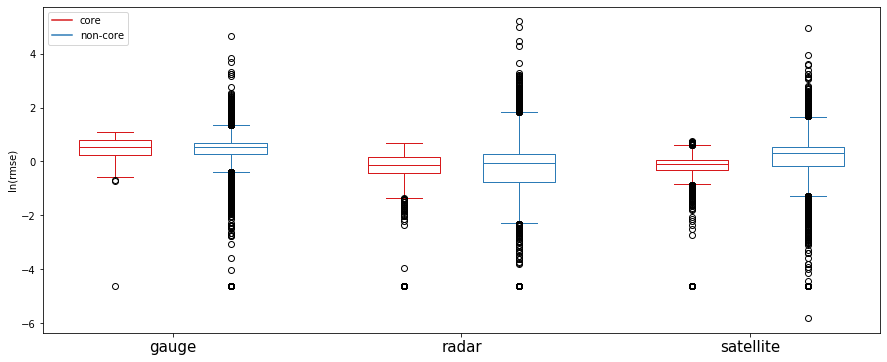

In [132]:
fig= plt.figure(figsize=(15,6))
bxl_1= plt.boxplot([np.log(stats_zone['gauge_rmse'][0]), np.log(stats_zone['radar_rmse'][0]), np.log(stats_zone['satellite_rmse'][0])],
              positions= np.array(range(3))*2-0.4, widths= .5)
bxr_1= plt.boxplot([np.log(stats_zone['gauge_rmse'][1]), np.log(stats_zone['radar_rmse'][1]), np.log(stats_zone['satellite_rmse'][1])],
              positions= np.array(range(3))*2+0.4, widths= .5)
set_box_color(bxl_1, '#D7191C')
set_box_color(bxr_1, '#2C7BB6')
plt.plot([], c='#D7191C', label='core')
plt.plot([], c='#2C7BB6', label='non-core')
plt.legend()
plt.ylabel('ln(rmse)')
plt.xticks(range(0, 3 * 2, 2), ['gauge', 'radar', 'satellite'], fontsize=15)
fig.savefig('rmse_zone.png', dpi=100)

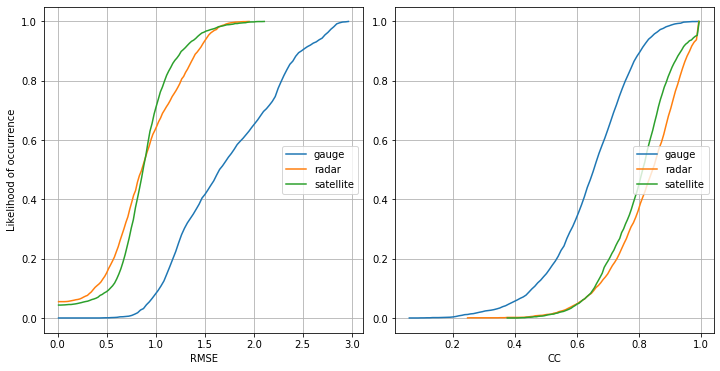

In [133]:
# cumulative plots
# gauge_cum= stats_zone['gauge_rmse'][0].cumsum()/stats_zone['gauge_rmse'][0].sum()
# radar_cum= stats_zone['radar_rmse'][0].cumsum()/stats_zone['radar_rmse'][0].sum()
# sat_cum= stats_zone['sat_rmse'][0].cumsum()/stats_zone['sat_rmse'][0].sum()
def hist(x):
    value, base= np.histogram(x, bins=100)
    
    return np.cumsum(value)/value.sum(), base

gauge_value, gauge_base= hist(stats_zone['gauge_rmse'][0])
radar_value, radar_base= hist(stats_zone['radar_rmse'][0])
sat_value, sat_base= hist(stats_zone['satellite_rmse'][0])

fig, ax = plt.subplots(1,2, figsize=(12, 6))

# plot the cumulative histogram
ax[0].plot(gauge_base[:-1], gauge_value, label='gauge',color='C0')
ax[0].plot(radar_base[:-1], radar_value, label='radar',color='C1')
ax[0].plot(sat_base[:-1], sat_value, label='satellite',color='C2')

# tidy up the figure
ax[0].grid(True)
ax[0].legend(loc='right')
ax[0].set_xlabel('RMSE')
ax[0].set_ylabel('Likelihood of occurrence')

gauge_value, gauge_base= hist(stats_zone['gauge_cc'][0])
radar_value, radar_base= hist(stats_zone['radar_cc'][0])
sat_value, sat_base= hist(stats_zone['satellite_cc'][0])

fig.subplots_adjust(wspace=0.1)

ax[1].plot(gauge_base[:-1], gauge_value, label='gauge',color='C0')
ax[1].plot(radar_base[:-1], radar_value, label='radar',color='C1')
ax[1].plot(sat_base[:-1], sat_value, label='satellite',color='C2')

# tidy up the figure
ax[1].grid(True)
ax[1].legend(loc='right')
ax[1].set_xlabel('CC')
# ax[1].set_xlim([0,1])

plt.show()
fig.savefig('cumulative_plt.png', dpi=100)

## Dynamic range plots for hurricane core

In [156]:
def nonzero(gauge, sat, radar):
    mask= (gauge>0) & (radar>400) & (sat>0)
    return gauge[mask], radar[mask], sat[mask]

def make_barplot(gauge, radar, sat, rmse_gauge, rmse_radar, rmse_sat, cc_gauge, cc_radar, cc_sat):
    '''make categories that fall each inside'''
    x= [400,450,500,550,600,650,700,750,800,850,900,1000,1100,1200,1400,1600,1700]
    gauge_counts= []
    radar_counts= []
    sat_counts= []
    gauge_rmse= []
    radar_rmse= []
    sat_rmse= []
    gauge_cc= []
    radar_cc= []
    sat_cc= []
    for i in range(len(x)-1):
        mask_gauge= (gauge<x[i+1]) & (gauge>x[i])
        mask_radar= (radar<x[i+1]) & (radar>x[i])
        mask_sat= (sat<x[i+1]) & (sat>x[i])
        gauge_counts.append(mask_gauge.sum())
        radar_counts.append(mask_radar.sum())
        sat_counts.append(mask_sat.sum())
        gauge_rmse.append(rmse_gauge[mask_gauge])
        radar_rmse.append(rmse_radar[mask_radar])
        sat_rmse.append(rmse_sat[mask_sat])
        gauge_cc.append(cc_gauge[mask_gauge])
        radar_cc.append(cc_radar[mask_radar])
        sat_cc.append(cc_sat[mask_sat])
        
    stats= pd.DataFrame()
    stats['left']= x[:-1]
    stats['right']= x[1:]
    stats['gauge_counts']= gauge_counts
    stats['radar_counts']= radar_counts
    stats['sat_counts']= sat_counts
#     stats['gauge_rmse']= gauge_rmse_mean
#     stats['radar_rmse']= radar_rmse_mean
#     stats['sat_rmse']= sat_rmse_mean
#     stats['gauge_cc']= gauge_cc_mean
#     stats['radar_cc']= radar_cc_mean
#     stats['sat_cc']= sat_cc_mean
    
    return stats, gauge_rmse, radar_rmse, sat_rmse, gauge_cc, radar_cc, sat_cc

In [293]:
# read data
radar_cone_sum= gdal.Open('TCresults/zone_sum_radar.tif').ReadAsArray()
gauge_cone_sum= gdal.Open('TCresults/zone_sum_gauge.tif').ReadAsArray()
sat_cone_sum= gdal.Open('TCresults/zone_sum_satellite.tif').ReadAsArray()
gauge_cone_rmse= gdal.Open('TCresults/zone_rmse_gauge.tif').ReadAsArray()
radar_cone_rmse= gdal.Open('TCresults/zone_rmse_radar.tif').ReadAsArray()
sat_cone_rmse= gdal.Open('TCresults/zone_rmse_sat.tif').ReadAsArray()
gauge_cone_cc= gdal.Open('TCresults/zone_cc_gauge.tif').ReadAsArray()
radar_cone_cc= gdal.Open('TCresults/zone_cc_radar.tif').ReadAsArray()
sat_cone_cc= gdal.Open('TCresults/zone_cc_sat.tif').ReadAsArray()


In [294]:
# gauge_cone_sum, radar_cone_sum, sat_cone_sum= nonzero(gauge_cone_sum, radar_cone_sum, sat_cone_sum)
stats, gauge_rmse, radar_rmse, sat_rmse, gauge_cc, radar_cc, sat_cc= make_barplot(gauge_cone_sum,radar_cone_sum,sat_cone_sum,gauge_cone_rmse,radar_cone_rmse,sat_cone_rmse,gauge_cone_cc,
                   radar_cone_cc,sat_cone_cc)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


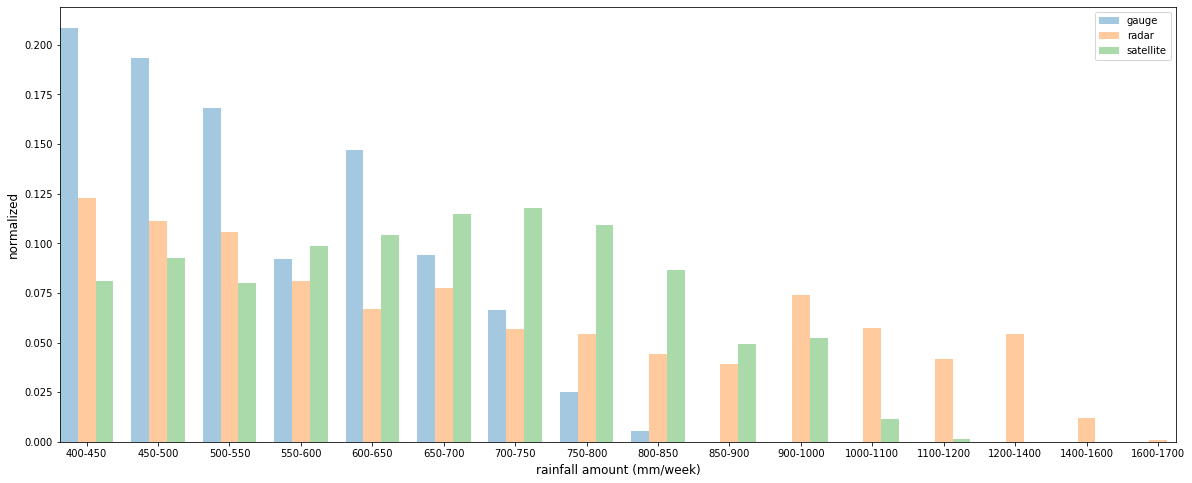

In [159]:
fig= plt.figure(figsize=(20,8))
barWidth= 0.25
r1 = np.arange(len(stats))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, (stats.gauge_counts)/(stats.gauge_counts).sum(), width=barWidth, label='gauge', alpha=0.4, color='C0')
plt.bar(r2, (stats.radar_counts)/(stats.radar_counts).sum(), width=barWidth, label='radar', alpha=0.4, color='C1')
plt.bar(r3, (stats.sat_counts)/(stats.sat_counts).sum(), width=barWidth, label='satellite', alpha=.4, color='C2')
# plt.plot(r1, stats.gauge_rmse/stats.gauge_rmse.sum(), 'o--', color='C0', label='gauge rmse')
# plt.plot(r2, stats.radar_rmse/stats.radar_rmse.sum(), 'o--', color='C1', label='radar rmse')
# plt.plot(r3, stats.sat_rmse/stats.sat_rmse.sum(), 'o--', color='C2', label='satellite rmse')
# plt.plot(r1, stats.gauge_cc/stats.gauge_cc.sum(), '-.',marker='v', color='C0', label='gauge cc')
# plt.plot(r2, stats.radar_cc/stats.radar_cc.sum(), '-.',marker='v', color='C1', label='radar cc')
# plt.plot(r3, stats.sat_cc/stats.sat_cc.sum(), '-.',marker='v', color='C2', label='satellite cc')
plt.xticks([r + barWidth for r in range(len(stats))], stats.left.astype(str)+'-'+stats.right.astype(str))
plt.ylabel('normalized', fontsize=12)
plt.xlabel('rainfall amount (mm/week)', fontsize=12)
plt.xlim([r1.min()-0.125,max(r3)])
plt.legend()
# fig.savefig('dynamic range bar.png', dpi=100)

In [223]:
def remove_nan(l):
    arr= np.array(l)
    mask= np.isnan(arr)
    
    return l[~mask]

In [256]:
for i in range(components_per):
    
    gauge_rmse[i]= remove_nan(gauge_rmse[i])
    gauge_cc[i]= remove_nan(gauge_cc[i])
    radar_rmse[i]= remove_nan(radar_rmse[i])
    radar_cc[i]= remove_nan(radar_cc[i])
    sat_rmse[i]= remove_nan(sat_rmse[i])
    sat_cc[i]= remove_nan(sat_cc[i])

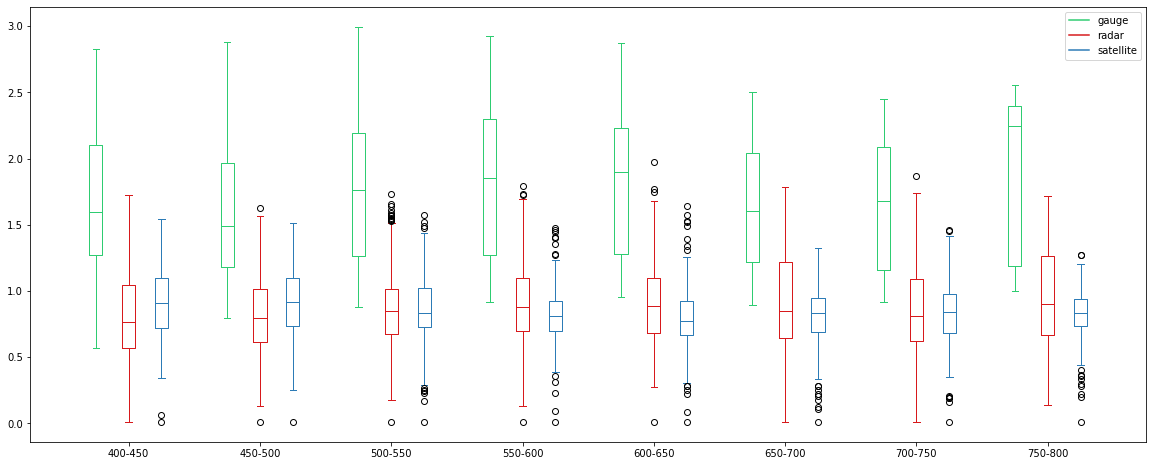

In [231]:
# box plot for each range as stats
boxWidth= 0.25
components_per= len(stats)//2
r1 = np.arange(components_per)
r2 = [x + boxWidth for x in r1]
r3 = [x + boxWidth for x in r2]
fig= plt.figure(figsize=(20,8))
bxl= plt.boxplot(gauge_rmse[:components_per], positions= r1, widths=0.1)
bxm= plt.boxplot(radar_rmse[:components_per], positions= r2, widths=0.1)
bxr= plt.boxplot(sat_rmse[:components_per], positions= r3, widths=0.1)
plt.plot([],c= '#2ecc71', label='gauge')
plt.plot([],c= '#D7191C', label='radar')
plt.plot([],c= '#2C7BB6', label='satellite')
set_box_color(bxl, '#2ecc71')
set_box_color(bxm, '#D7191C')
set_box_color(bxr, '#2C7BB6')
plt.xticks([r + boxWidth for r in range(len(r1))], stats.left.astype(str)+'-'+stats.right.astype(str))
plt.legend()
plt.show()

## Dynamic range plots for hurricane core

In [247]:
def nonzero(gauge, sat, radar):
    mask= (gauge>0) & (radar>400) & (sat>0)
    return gauge[mask], radar[mask], sat[mask]

def make_barplot_non_core(gauge, radar, sat, rmse_gauge, rmse_radar, rmse_sat, cc_gauge, cc_radar, cc_sat):
    '''make categories that fall each inside'''
    x= np.arange(50,450,50)
    gauge_counts= []
    radar_counts= []
    sat_counts= []
    gauge_rmse_mean= []
    radar_rmse_mean= []
    sat_rmse_mean= []
    gauge_cc_mean= []
    radar_cc_mean= []
    sat_cc_mean= []
    for i in range(len(x)-1):
        mask_gauge= (gauge<x[i+1]) & (gauge>x[i])
        mask_radar= (radar<x[i+1]) & (radar>x[i])
        mask_sat= (sat<x[i+1]) & (sat>x[i])
        gauge_counts.append(mask_gauge.sum())
        radar_counts.append(mask_radar.sum())
        sat_counts.append(mask_sat.sum())
        gauge_rmse_mean.append(rmse_gauge[mask_gauge])
        radar_rmse_mean.append(rmse_radar[mask_radar])
        sat_rmse_mean.append(rmse_sat[mask_sat])
        gauge_cc_mean.append(cc_gauge[mask_gauge])
        radar_cc_mean.append(cc_radar[mask_radar])
        sat_cc_mean.append(cc_sat[mask_sat])
        
    stats= pd.DataFrame()
    stats['left']= x[:-1]
    stats['right']= x[1:]
    stats['gauge_counts']= gauge_counts
    stats['radar_counts']= radar_counts
    stats['sat_counts']= sat_counts

    
    return stats,gauge_rmse_mean,radar_rmse_mean,sat_rmse_mean,gauge_cc_mean,radar_cc_mean,sat_cc_mean

In [295]:
# read data
radar_non_cone_sum= gdal.Open('TCresults/none_core_radar_satellite_sum_radar.tif').ReadAsArray()
gauge_non_cone_sum= gdal.Open('TCresults/none_core_gauge_satellite_sum_gauge.tif').ReadAsArray()
sat_non_cone_sum= gdal.Open('TCresults/none_core_gauge_satellite_sum_satellite.tif').ReadAsArray()
gauge_non_cone_rmse= gdal.Open('TCresults/none_core_rmse_gauge.tif').ReadAsArray()
radar_non_cone_rmse= gdal.Open('TCresults/none_core_rmse_radar.tif').ReadAsArray()
sat_non_cone_rmse= gdal.Open('TCresults/none_core_rmse_sat.tif').ReadAsArray()
gauge_non_cone_cc= gdal.Open('TCresults/none_core_cc_gauge.tif').ReadAsArray()
radar_non_cone_cc= gdal.Open('TCresults/none_core_cc_radar.tif').ReadAsArray()
sat_non_cone_cc= gdal.Open('TCresults/none_core_cc_sat.tif').ReadAsArray()

In [296]:
# gauge_cone_sum, radar_cone_sum, sat_cone_sum= nonzero(gauge_cone_sum, radar_cone_sum, sat_cone_sum)
stats_non_core, gauge_rmse_non_core, radar_rmse_non_core, sat_rmse_non_core, gauge_cc_non_core, radar_cc_non_core, sat_cc_non_core\
= make_barplot_non_core(gauge_non_cone_sum,radar_non_cone_sum,sat_non_cone_sum,gauge_non_cone_rmse,
                                      radar_non_cone_rmse,sat_non_cone_rmse,gauge_non_cone_cc,radar_non_cone_cc,sat_non_cone_cc)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


In [255]:
for i in range(len(gauge_rmse_non_core)):
    
    gauge_rmse_non_core[i]= remove_nan(gauge_rmse_non_core[i])
    gauge_cc_non_core[i]= remove_nan(gauge_cc_non_core[i])
    radar_rmse_non_core[i]= remove_nan(radar_rmse_non_core[i])
    radar_cc_non_core[i]= remove_nan(radar_cc_non_core[i])
    sat_rmse_non_core[i]= remove_nan(sat_rmse_non_core[i])
    sat_cc_non_core[i]= remove_nan(sat_cc_non_core[i])

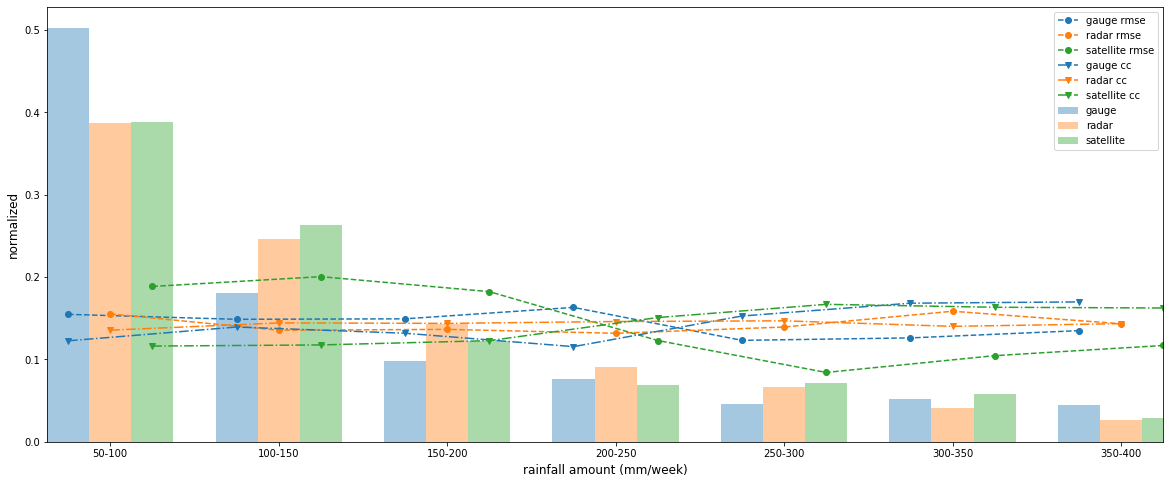

In [150]:
fig= plt.figure(figsize=(20,8))
barWidth= 0.25
r1 = np.arange(len(stats_non_core))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, (stats_non_core.gauge_counts)/(stats_non_core.gauge_counts).sum(), width=barWidth, label='gauge', alpha=0.4, color='C0')
plt.bar(r2, (stats_non_core.radar_counts)/(stats_non_core.radar_counts).sum(), width=barWidth, label='radar', alpha=0.4, color='C1')
plt.bar(r3, (stats_non_core.sat_counts)/(stats_non_core.sat_counts).sum(), width=barWidth, label='satellite', alpha=.4, color='C2')
# plt.plot(r1, stats_non_core.gauge_rmse/stats_non_core.gauge_rmse.sum(), 'o--', color='C0', label='gauge rmse')
# plt.plot(r2, stats_non_core.radar_rmse/stats_non_core.radar_rmse.sum(), 'o--', color='C1', label='radar rmse')
# plt.plot(r3, stats_non_core.sat_rmse/stats_non_core.sat_rmse.sum(), 'o--', color='C2', label='satellite rmse')
# plt.plot(r1, stats_non_core.gauge_cc/stats_non_core.gauge_cc.sum(), '-.',marker='v', color='C0', label='gauge cc')
# plt.plot(r2, stats_non_core.radar_cc/stats_non_core.radar_cc.sum(), '-.',marker='v', color='C1', label='radar cc')
# plt.plot(r3, stats_non_core.sat_cc/stats_non_core.sat_cc.sum(), '-.',marker='v', color='C2', label='satellite cc')
plt.xticks([r + barWidth for r in range(len(stats_non_core))], stats_non_core.left.astype(str)+'-'+stats_non_core.right.astype(str))
plt.ylabel('normalized', fontsize=12)
plt.xlabel('rainfall amount (mm/week)', fontsize=12)
plt.xlim([r1.min()-0.125,max(r3)])
plt.legend()
# fig.savefig('dynamic range bar.png', dpi=100)

## Wrap up graphs

In [236]:
stats.left.astype(str)+'-'+stats.right.astype(str)

0       400-450
1       450-500
2       500-550
3       550-600
4       600-650
5       650-700
6       700-750
7       750-800
8       800-850
9       850-900
10     900-1000
11    1000-1100
12    1100-1200
13    1200-1400
14    1400-1600
15    1600-1700
dtype: object

#### rainfall amount distribution plot

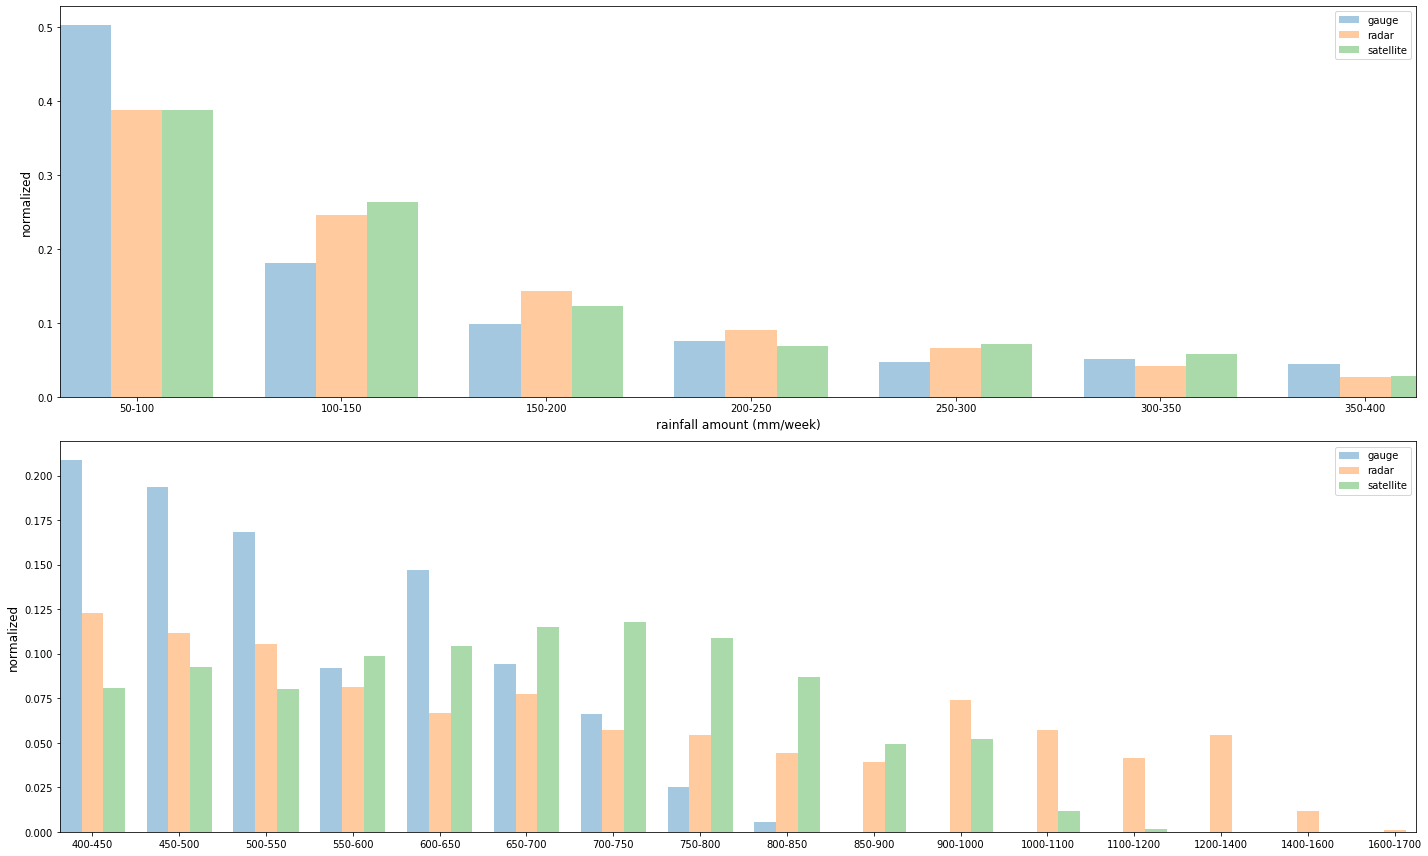

In [265]:
fig, ax= plt.subplots(2,1,figsize=(20,12))
fig.subplots_adjust(wspace=0.01)
barWidth= 0.25
r1 = np.arange(len(stats))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
ax[1].bar(r1, (stats.gauge_counts)/(stats.gauge_counts).sum(), width=barWidth, label='gauge', alpha=0.4, color='C0')
ax[1].bar(r2, (stats.radar_counts)/(stats.radar_counts).sum(), width=barWidth, label='radar', alpha=0.4, color='C1')
ax[1].bar(r3, (stats.sat_counts)/(stats.sat_counts).sum(), width=barWidth, label='satellite', alpha=.4, color='C2')
ax[1].set_xticks([r + barWidth for r in range(len(stats))])
ax[1].set_xticklabels( stats.left.astype(str)+'-'+stats.right.astype(str))
ax[1].set_ylabel('normalized', fontsize=12)
ax[1].set_xlim([r1.min()-0.125,max(r3)])
ax[1].legend()
r1 = np.arange(len(stats_non_core))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
ax[0].bar(r1, (stats_non_core.gauge_counts)/(stats_non_core.gauge_counts).sum(), width=barWidth, label='gauge', alpha=0.4, color='C0')
ax[0].bar(r2, (stats_non_core.radar_counts)/(stats_non_core.radar_counts).sum(), width=barWidth, label='radar', alpha=0.4, color='C1')
ax[0].bar(r3, (stats_non_core.sat_counts)/(stats_non_core.sat_counts).sum(), width=barWidth, label='satellite', alpha=.4, color='C2')
ax[0].set_ylabel('normalized', fontsize=12)
ax[0].set_xlabel('rainfall amount (mm/week)', fontsize=12)
ax[0].set_xlim([r1.min()-0.125,max(r3)])
ax[0].set_xticks([r + barWidth for r in range(len(stats_non_core))])
ax[0].set_xticklabels( stats_non_core.left.astype(str)+'-'+stats_non_core.right.astype(str))
ax[0].legend()
plt.tight_layout()
fig.savefig('wraped_hist.png',dpi=100)

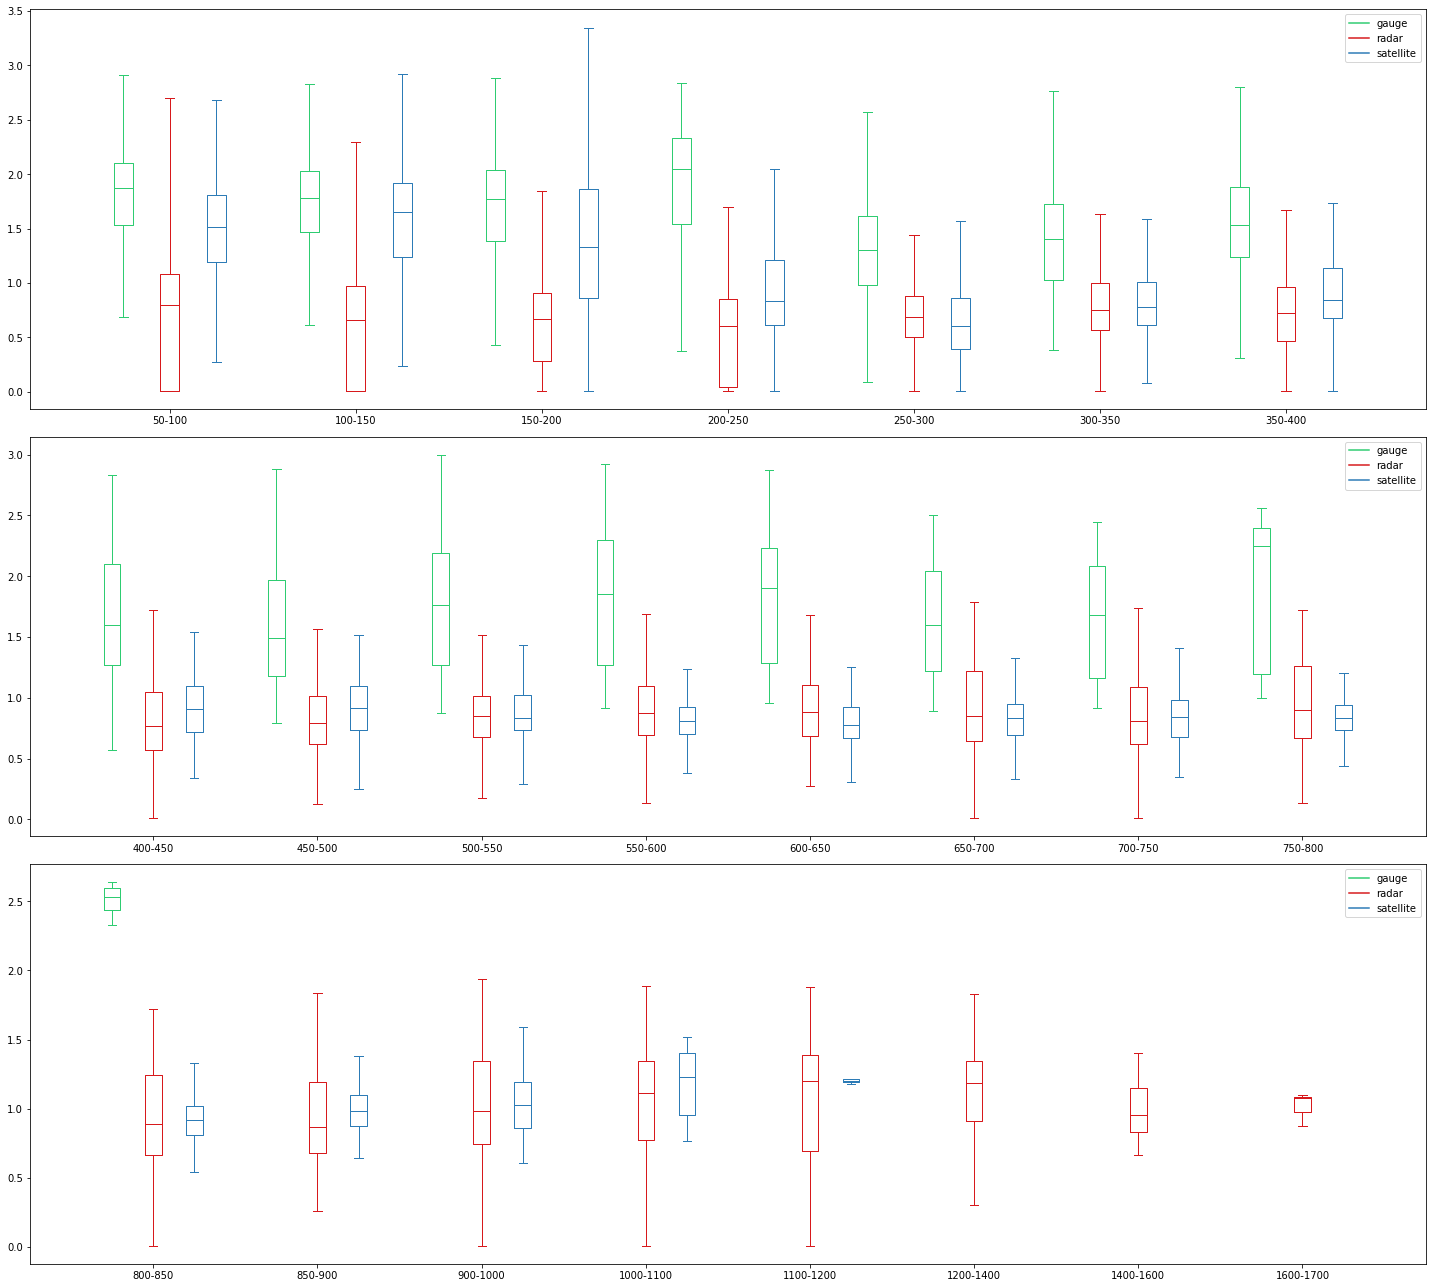

In [263]:
boxWidth= 0.25
components_per= len(stats)//2
r1 = np.arange(components_per)
r2 = [x + boxWidth for x in r1]
r3 = [x + boxWidth for x in r2]
fig, ax= plt.subplots(3,1,figsize=(20,18))
bxl= ax[1].boxplot(gauge_rmse[:components_per], positions= r1, widths=0.1, showfliers=False)
bxm= ax[1].boxplot(radar_rmse[:components_per], positions= r2, widths=0.1, showfliers=False)
bxr= ax[1].boxplot(sat_rmse[:components_per], positions= r3, widths=0.1, showfliers=False)
ax[1].plot([],c= '#2ecc71', label='gauge')
ax[1].plot([],c= '#D7191C', label='radar')
ax[1].plot([],c= '#2C7BB6', label='satellite')
set_box_color(bxl, '#2ecc71')
set_box_color(bxm, '#D7191C')
set_box_color(bxr, '#2C7BB6')
ax[1].set_xticks([r + boxWidth for r in range(len(r1))])
ax[1].set_xticklabels(stats.left.astype(str)[:components_per]+'-'+stats.right.astype(str)[:components_per])
ax[1].legend()

bxl= ax[2].boxplot(gauge_rmse[components_per:], positions= r1, widths=0.1, showfliers=False)
bxm= ax[2].boxplot(radar_rmse[components_per:], positions= r2, widths=0.1, showfliers=False)
bxr= ax[2].boxplot(sat_rmse[components_per:], positions= r3, widths=0.1, showfliers=False)
ax[2].plot([],c= '#2ecc71', label='gauge')
ax[2].plot([],c= '#D7191C', label='radar')
ax[2].plot([],c= '#2C7BB6', label='satellite')
set_box_color(bxl, '#2ecc71')
set_box_color(bxm, '#D7191C')
set_box_color(bxr, '#2C7BB6')
ax[2].set_xticks([r + boxWidth for r in range(len(r1))])
ax[2].set_xticklabels(stats.left.astype(str)[components_per:]+'-'+stats.right.astype(str)[components_per:])
ax[2].legend()

r1 = np.arange(len(stats_non_core))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
bxl= ax[0].boxplot(gauge_rmse_non_core, positions= r1, widths=0.1, showfliers=False)
bxm= ax[0].boxplot(radar_rmse_non_core, positions= r2, widths=0.1, showfliers=False)
bxr= ax[0].boxplot(sat_rmse_non_core, positions= r3, widths=0.1, showfliers=False)
ax[0].plot([],c= '#2ecc71', label='gauge')
ax[0].plot([],c= '#D7191C', label='radar')
ax[0].plot([],c= '#2C7BB6', label='satellite')
set_box_color(bxl, '#2ecc71')
set_box_color(bxm, '#D7191C')
set_box_color(bxr, '#2C7BB6')
ax[0].set_xticks([r + boxWidth for r in range(len(r1))])
ax[0].set_xticklabels(stats_non_core.left.astype(str)+'-'+stats_non_core.right.astype(str))
ax[0].legend()
plt.tight_layout()
fig.savefig('wraped_boxplot.png', dpi=100)

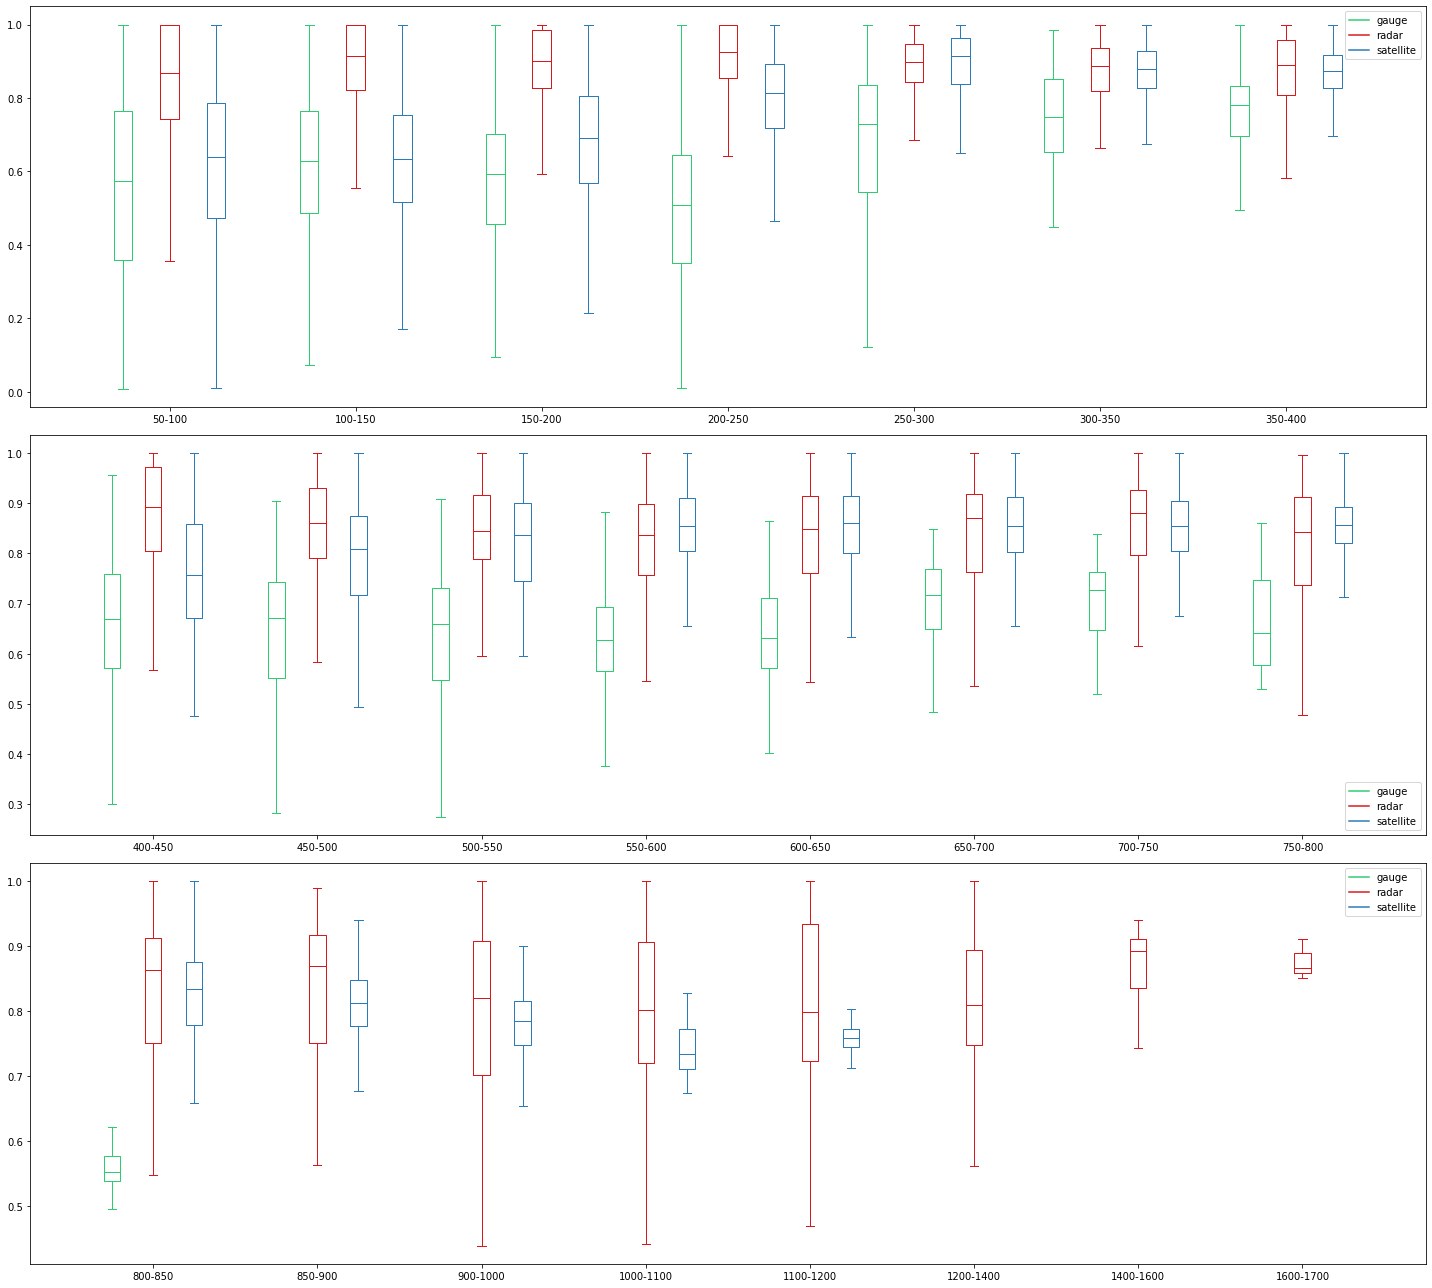

In [278]:
boxWidth= 0.25
components_per= len(stats)//2
r1 = np.arange(components_per)
r2 = [x + boxWidth for x in r1]
r3 = [x + boxWidth for x in r2]
fig, ax= plt.subplots(3,1,figsize=(20,18))
bxl= ax[1].boxplot(gauge_cc[:components_per], positions= r1, widths=0.1, showfliers=False)
bxm= ax[1].boxplot(radar_cc[:components_per], positions= r2, widths=0.1, showfliers=False)
bxr= ax[1].boxplot(sat_cc[:components_per], positions= r3, widths=0.1, showfliers=False)
ax[1].plot([],c= '#2ecc71', label='gauge')
ax[1].plot([],c= '#D7191C', label='radar')
ax[1].plot([],c= '#2C7BB6', label='satellite')
set_box_color(bxl, '#2ecc71')
set_box_color(bxm, '#D7191C')
set_box_color(bxr, '#2C7BB6')
ax[1].set_xticks([r + boxWidth for r in range(len(r1))])
ax[1].set_xticklabels(stats.left.astype(str)[:components_per]+'-'+stats.right.astype(str)[:components_per])
ax[1].legend()

bxl= ax[2].boxplot(gauge_cc[components_per:], positions= r1, widths=0.1, showfliers=False)
bxm= ax[2].boxplot(radar_cc[components_per:], positions= r2, widths=0.1, showfliers=False)
bxr= ax[2].boxplot(sat_cc[components_per:], positions= r3, widths=0.1, showfliers=False)
ax[2].plot([],c= '#2ecc71', label='gauge')
ax[2].plot([],c= '#D7191C', label='radar')
ax[2].plot([],c= '#2C7BB6', label='satellite')
set_box_color(bxl, '#2ecc71')
set_box_color(bxm, '#D7191C')
set_box_color(bxr, '#2C7BB6')
ax[2].set_xticks([r + boxWidth for r in range(len(r1))])
ax[2].set_xticklabels(stats.left.astype(str)[components_per:]+'-'+stats.right.astype(str)[components_per:])
ax[2].legend()

r1 = np.arange(len(stats_non_core))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
bxl= ax[0].boxplot(gauge_cc_non_core, positions= r1, widths=0.1, showfliers=False)
bxm= ax[0].boxplot(radar_cc_non_core, positions= r2, widths=0.1, showfliers=False)
bxr= ax[0].boxplot(sat_cc_non_core, positions= r3, widths=0.1, showfliers=False)
ax[0].plot([],c= '#2ecc71', label='gauge')
ax[0].plot([],c= '#D7191C', label='radar')
ax[0].plot([],c= '#2C7BB6', label='satellite')
set_box_color(bxl, '#2ecc71')
set_box_color(bxm, '#D7191C')
set_box_color(bxr, '#2C7BB6')
ax[0].set_xticks([r + boxWidth for r in range(len(r1))])
ax[0].set_xticklabels(stats_non_core.left.astype(str)+'-'+stats_non_core.right.astype(str))
ax[0].legend()
plt.tight_layout()
fig.savefig('wraped_boxplot_cc.png', dpi=100)

In [312]:
rmse_gauge= []
cc_gauge= []
rmse_radar= []
cc_radar= []
rmse_sat= []
cc_sat= []
for i in range(len(gauge_rmse)+len(gauge_rmse_non_core)):
    if i<len(gauge_rmse_non_core):
        rmse_gauge.append(np.nanmean(gauge_rmse_non_core[i]))
        cc_gauge.append(np.nanmean(gauge_cc_non_core[i]))
        rmse_radar.append(np.nanmean(radar_rmse_non_core[i]))
        cc_radar.append(np.nanmean(radar_cc_non_core[i]))
        rmse_sat.append(np.nanmean(sat_rmse_non_core[i]))
        cc_sat.append(np.nanmean(sat_cc_non_core[i]))
    elif i>=len(gauge_rmse_non_core):
        rmse_gauge.append(np.nanmean(gauge_rmse[i-len(gauge_rmse_non_core)]))
        cc_gauge.append(np.nanmean(gauge_cc[i-len(gauge_rmse_non_core)]))
        rmse_radar.append(np.nanmean(radar_rmse[i-len(gauge_rmse_non_core)]))
        cc_radar.append(np.nanmean(radar_cc[i-len(gauge_rmse_non_core)]))
        rmse_sat.append(np.nanmean(sat_rmse[i-len(gauge_rmse_non_core)]))
        cc_sat.append(np.nanmean(sat_cc[i-len(gauge_rmse_non_core)]))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


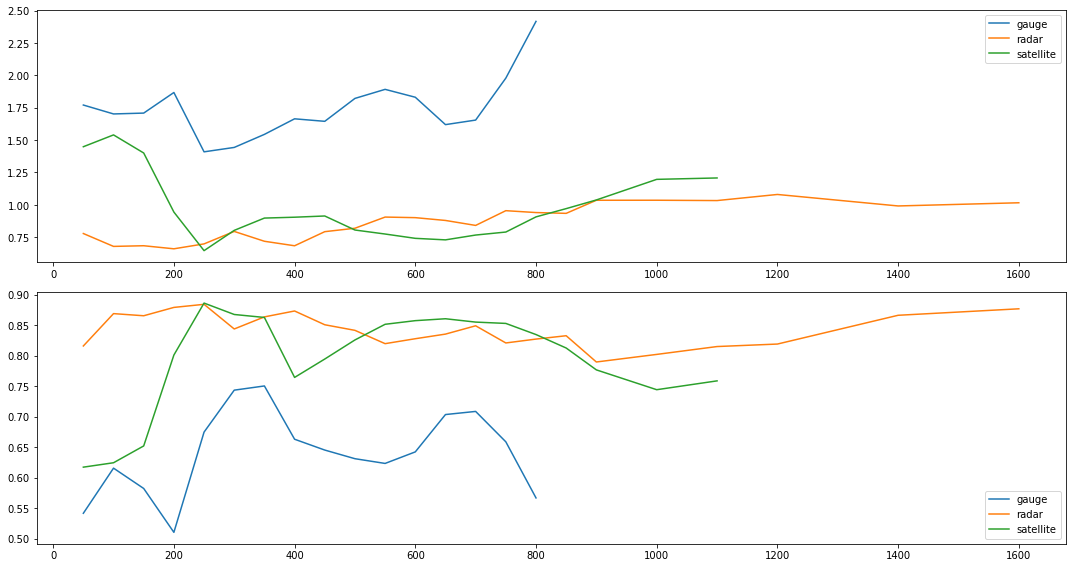

In [319]:
x= list(stats_non_core.left.values)+list(stats.left.values)
fig, ax= plt.subplots(2,1,figsize=(15,8))
ax[0].plot(x, rmse_gauge, label='gauge', c='C0')
ax[0].plot(x, rmse_radar, label='radar', c='C1')
ax[0].plot(x, rmse_sat, label='satellite',c='C2')
ax[0].legend()
ax[1].plot(x, cc_gauge, label='gauge', c='C0')
ax[1].plot(x, cc_radar, label='radar', c='C1')
ax[1].plot(x, cc_sat, label='satellite', c='C2')
ax[1].legend()
plt.tight_layout()
fig.savefig('perf_with_rain_amt.png', dpi=100)

### Look for maximum rainfall rate day